## Esercizio Classificazione NLP2

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv'

In [3]:
df = pd.read_csv(path)
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


Prima riga

In [4]:
df['text'][0]

' I`d have responded, if I were going'

In [5]:
# Definisci i pattern della REGEX


patterns = {
             r'\d+': '',             # remove digits (numeri)
             #r'\b': '',               # rimuove tutte le n'
             r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
             r'\b\w{1,2}\b':'',      # remove all token less than2 characters
             r'(http|www)[^\s]+':'', # remove website
             r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

#solo in preview
clean_column(df, 'text', patterns)

,textID,text,selected_text,sentiment
0,cb774db0d1,have responded were going,"I`d have responded, if I were going",neutral
1,549e992a42,sooo sad will miss you here san diego,Sooo SAD,negative
2,088c60f138,boss bullying,bullying me,negative
3,9642c003ef,what interview leave alone,leave me alone,negative
4,358bd9e861,sons why couldnt they put them the releases a...,"Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish could come see denver husband lost his j...,d lost,negative
27477,4f4c4fc327,ive wondered about rake the client has made c...,", don`t force",negative
27478,f67aae2310,yay good for both you enjoy the break you pro...,Yay good for both of you.,positive
27479,ed167662a5,but was worth,But it was worth it ****.,positive


In [6]:
df['text'][0]

' have responded were going'

Conversione in stringhe 

In [7]:
text = list(map(str, df['text'])) #trasformi la collonna in stringa 
text = ''.join(text)

In [8]:
text

' have responded were going sooo sad will miss you here san diego boss bullying  what interview leave alone sons why couldnt they put them the releases already bought some shameless plugging for the best rangers forum earth feedings for the baby are fun when all smiles and coossoooo high both you journey wow just became cooler hehe that possible much love hopeful reckon the chances are minimal never gonna get cake and stuff really really like the song love story taylor swift sharpie running dangerously low ink want music tonight but lost voicetest test from the env sunburned sok trying plot alternatives speak sighive been sick for the past few days and thus hair looks wierd didnt have hat would look  back home now gonna miss every onehes just not that into you marly sorry hope you find her soon playing ghost online really interesting the new updates are kirin pet and metamorph for third job cant wait have dragon pet cleaning the house for her family who comming later todaygotta restart

In [9]:
text_neutral = list(map(str, df[df['sentiment']=='neutral']['text']))
text_positive = list(map(str, df[df['sentiment']=='positive']['text']))
text_negative = list(map(str, df[df['sentiment']=='negative']['text']))

text_neutral = ''.join(text_neutral)
text_positive = ''.join(text_positive)
text_negative = ''.join(text_negative)

(-0.5, 799.5, 399.5, -0.5)

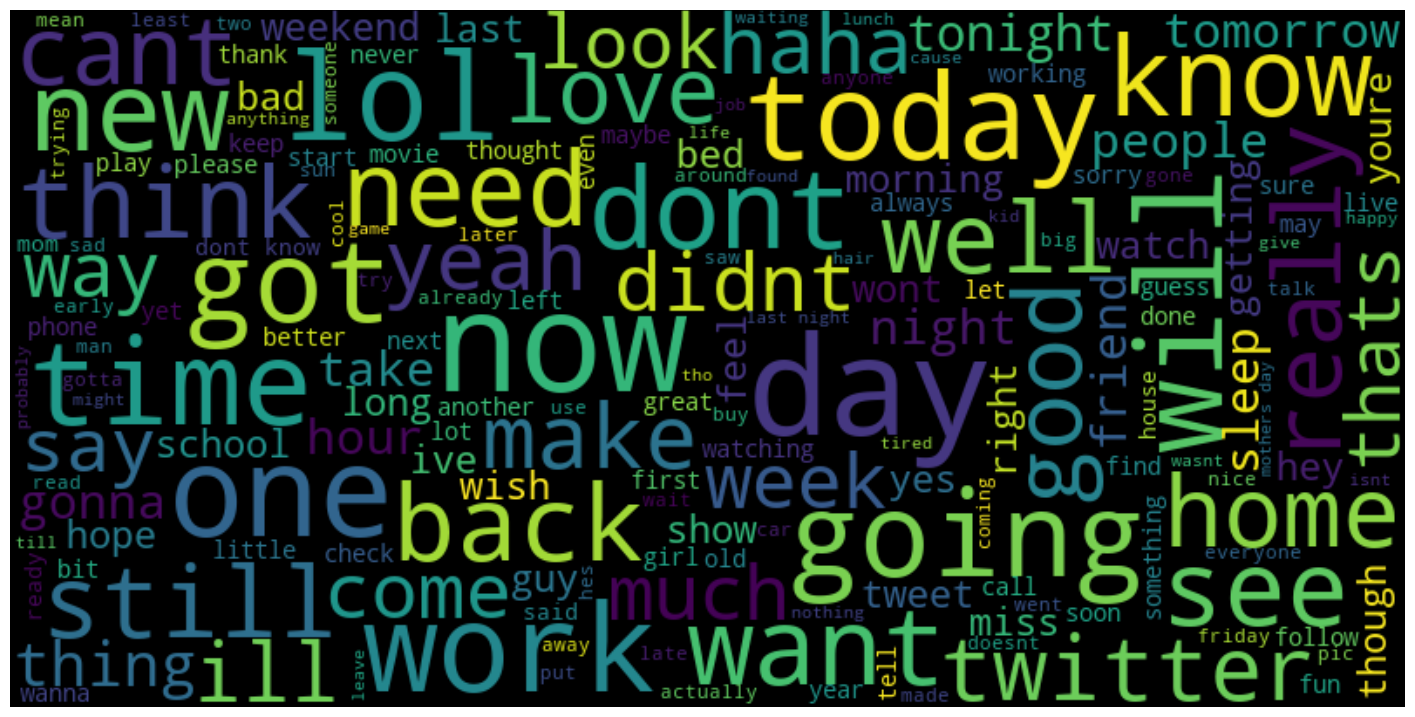

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_neutral)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")